In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats # Many functions for probability distributions in python are in scipy.stats
import os
from scipy.stats import variation 
from scipy.stats import ttest_rel
import statistics as s


In [4]:
df=pd.read_csv('A+&+B+shingles.csv')

In [7]:
df.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [8]:
df.shape

(36, 2)

In [9]:
df.isnull().sum()

A    0
B    5
dtype: int64

In [11]:
df.dtypes

A    float64
B    float64
dtype: object

In [12]:
print('3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.')

3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


In [16]:
print(' With a basic describe function we can clearly see that the avg. moisture content of groups A and B are with the persimmisble limits.')

 With a basic describe function we can clearly see that the avg. moisture content of groups A and B are with the persimmisble limits.


In [ ]:
#Before we perform the test, we need to decide if we’ll assume the two populations have equal variances or not. As a rule of thumb, we can assume the populations have equal variances if the ratio of the larger sample variance to the smaller sample variance is less than 4:1.


In [112]:
tscore, pvalue =stats.ttest_1samp(a=df.A, popmean=0.35,nan_policy='omit')
print("t Statistic: ", tscore)  
print("P Value_A: ", pvalue/2)#the result should be taken only for a single tail test
        

t Statistic:  -1.4735046253382782
P Value_A:  0.07477633144907513


In [113]:
tscore_B, pvalue_B =stats.ttest_1samp(a=df.B, popmean=0.35,nan_policy='omit')
print("t Statistic: ", tscore_B)  
print("P Value_B: ", pvalue_B/2)#the result should be taken only for a single tail test

t Statistic:  -3.1003313069986995
P Value_B:  0.0020904774003191826


NameError: name 'pvalue_A' is not defined

In [102]:
#Q3.2 Two Sample t-test

In [90]:
stats.ttest_ind(df['A'], df['B'], nan_policy='omit',equal_var=True)

Ttest_indResult(statistic=1.2896282719661123, pvalue=0.2017496571835306)

In [88]:
stats.ttest_rel(df['A'], df['B'], nan_policy='omit')

Ttest_relResult(statistic=0.8445012483270872, pvalue=0.4050738703654352)

In [27]:
print('We see that the p-value < α . Thus, it is confirmed we are able to reject the the null hypothesis. With 95% confidence, we are able to accept the Null Hypothesis.')

We see that the p-value > α . Thus, it is confirmed we are failing to reject the the null hypothesis. With 95% confidence, we are able to accept the Null Hypothesis.


In [42]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

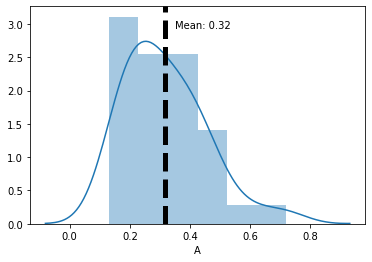

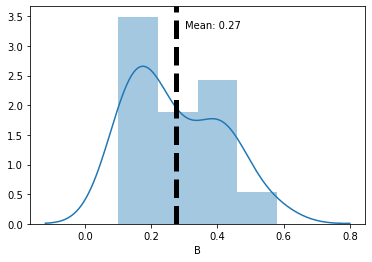

In [44]:
plot_distribution(df.A)
plot_distribution(df.B)

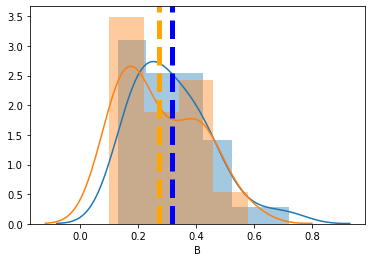

In [45]:
plt.figure()
ax1 = sns.distplot(df.A)
ax2 = sns.distplot(df.B)
plt.axvline(np.mean(df.A), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df.B), color='orange', linestyle='dashed', linewidth=5)